# Decision trees and ensemble learning

In this notebook the project is predicting if a customer fails to pay back a loan or not

# Credit risk scoring project

In [1]:
#importing libs

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading in the data from github

df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv")

## Data cleaning

In [3]:
# viewing the first rows of the dataframe

df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
# changing the col names to be all lowercase

df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
# using a map to convert numbers to strings by first defining a dictionary

status_values = {
    1:"ok",
    2:"default",
    0:"unk"
}

In [6]:
# using the dictionary above to convert the numbers to strings in the status col

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
# repeating the same process for the other categorical cols

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
 
df.home = df.home.map(home_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


In [8]:
# repeating the same process for the martial records and job cols

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
 
df.marital = df.marital.map(marital_values)
 
 
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
 
df.records = df.records.map(records_values)
 
 
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
 
df.job = df.job.map(job_values)

In [9]:
# looking at the numerical cols

In [10]:
#viewing the summary stats 

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
# 99999999.0 is an artifcial value used to represent missing values. Three values have this problem income, assets and debt
# replacing this big number with NaN 

for c in ["income","assets","debt"]:
  df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [12]:
# viewing the summary stats after the transformations

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
# Viewing the target variable status

df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [14]:
#Since we have one row with an unknown status we remove it from the dataset

df = df[df.status != "unk"]

# Dataset preparation

In [15]:
# using train_test_split from sckit-learn to split the dataset up

from sklearn.model_selection import train_test_split

df_train_full,df_test = train_test_split(df,test_size=0.2,random_state=11)

df_train, df_val = train_test_split(df_train_full,test_size = 0.25,random_state=11)

In [16]:
# checking the size of our datasets

len(df_train), len(df_val) , len(df_test)

(2672, 891, 891)

In [17]:
#creating our target variables

y_train = (df_train.status == "default").values
y_val = (df_val.status == "default").values

In [18]:
#removing "status" from the dataframes

del df_train["status"]
del df_val["status"]

In [19]:
#replacing the missing values with zero

df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [20]:
# converting the dataframes into dictionaries to feed into one-hot encoding

dict_train = df_train.to_dict(orient="records")
dict_val = df_val.to_dict(orient="records")

In [21]:
#feeding the list of dictionaries into the DictVectorizer

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(dict_train)
x_val = dv.transform(dict_val)

# Decision trees

## Decision tree classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# training the model 

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
#using AUC to score the model

from sklearn.metrics import roc_auc_score

In [25]:
# evaluating the performance on the training set

y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

In [26]:
# evaluating the performance of the validation dataset

y_pred = dt.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)

0.6529388970962196

In [27]:
# since the validation is only 65% the model is overfitting 

In [28]:
#trying to limit the number of lvls the tree has to reduce overfitting

dt = DecisionTreeClassifier(max_depth=2)

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
#visualizing the tree we just learned using the export text

from sklearn.tree import export_text

tree_text = export_text(dt,feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [30]:
#checking the new score from the new model

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)
 
y_pred = dt.predict_proba(x_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

train auc 0.7054989859726213
validation auc 0.6685264343319367


## Decision tree learning algorithm

## Parameter tuning for decision tree

In [31]:
# Finding the best parameters by tuning max_depth

for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(x_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.759
  10 -> 0.698
  15 -> 0.654
  20 -> 0.654
None -> 0.643


In [32]:
# tuning min_leaf_size for that we will iterate over the three best parameters of max_depth and for each go over different values of min_leaf_size

for m in [4, 5, 6]:
    print('depth: %s' % m)
 
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.766
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.753
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768



In [33]:
# The best values for max_depth and min_leaf_size are 6 and 15

#using these values to train the final model

dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Random forest

## Training a random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# specify the number of trees we want in the ensemble

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# evaluating the performance of the result

y_pred = rf.predict_proba(x_val)[:,1]

roc_auc_score(y_val,y_pred)

0.7923488169334723

In [37]:
# making the results consistent by seeding a random number generator

rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [38]:
#evaluating the new model

y_pred = rf.predict_proba(x_val)[:,1]

roc_auc_score(y_val,y_pred)

0.7811145285897654

In [39]:
#testing to see how many trees we need we can iterate over different values for n_estimators and see its effect on AUC

aucs = []
 
for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict_proba(x_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
 
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


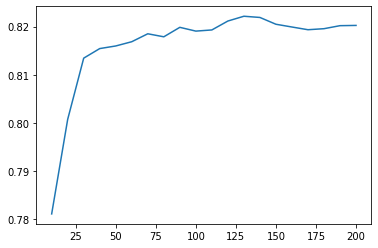

In [40]:
# plotting the results 

plt.plot(range(10,201,10),aucs)

## Parameter tuning for random forest

In [41]:
#Testing a few values for max_depth and see how AUC evolves as the number of trees grows

all_aucs = {}
 
for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []
 
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



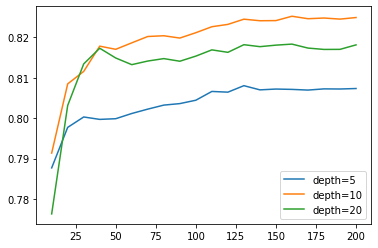

In [42]:
# for each value of max_depth we have a series of AUC scores plotting them 

num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

In [43]:
# max_depth 10 seems to be the best tuning the min_samples_leaf parameter using the same method

all_aucs = {}
 
for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []
 
    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



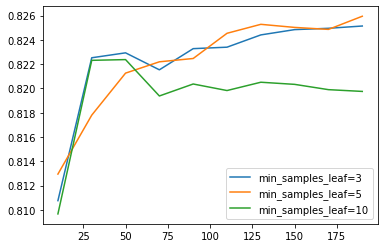

In [44]:
#plotting the results


num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()

In [45]:
# the best parameters for random forest for our problem are max_depth=10 , min_samples_leafs=5 and 200 trees

#Training final model

rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=5,random_state=1)

# Gradient boosting

## XGBoost: extreme gradient boosting

In [46]:
import xgboost as xgb

In [47]:
#before we can train an XGBoost model we need to wrap our data into DMatrix a special data structure for finding splits efficiently

dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=dv.feature_names_)

In [48]:
# doing the same for the validation dataset

dval = xgb.DMatrix(x_val,label=y_val,feature_names=dv.feature_names_)

In [49]:
# specifying the parameters for training. Only using a small subset of the default parameters of XGBoost

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [50]:
# For training an XGBoost model we use the train function starting with 10 trees

model = xgb.train(xgb_params,dtrain,num_boost_round=10)

In [51]:
# evaluating the model using the validation dataset

y_pred = model.predict(dval)

In [52]:
# calculating the AUC score

roc_auc_score(y_val,y_pred)

0.8152745150274878

## Model performance monitoring

In [53]:
# creating a watch list 

watchlist = [(dtrain,"train"),(dval,"val")]

In [54]:
#modifing the list of parameters

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [55]:
# training the model

model = xgb.train(xgb_params,dtrain,num_boost_round=100,evals=watchlist,verbose_eval=10)

[0]	train-auc:0.862996	val-auc:0.768179
[10]	train-auc:0.950021	val-auc:0.815577
[20]	train-auc:0.973165	val-auc:0.817748
[30]	train-auc:0.987718	val-auc:0.817875
[40]	train-auc:0.994562	val-auc:0.813873
[50]	train-auc:0.996881	val-auc:0.811282
[60]	train-auc:0.998887	val-auc:0.808006
[70]	train-auc:0.999439	val-auc:0.807316
[80]	train-auc:0.999847	val-auc:0.806771
[90]	train-auc:0.999915	val-auc:0.806371
[99]	train-auc:0.999975	val-auc:0.805457


## Parameter tuning for XGBoost

In [56]:
# changing the learning rate eta to 0.1 to see if that improves performance

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [57]:
#using 500 rounds for training

model = xgb.train(xgb_params,dtrain,num_boost_round=500,verbose_eval=10,evals=watchlist)

[0]	train-auc:0.862996	val-auc:0.768179
[10]	train-auc:0.915579	val-auc:0.800087
[20]	train-auc:0.939329	val-auc:0.809196
[30]	train-auc:0.954113	val-auc:0.815571
[40]	train-auc:0.963321	val-auc:0.818426
[50]	train-auc:0.970138	val-auc:0.823482
[60]	train-auc:0.976407	val-auc:0.824456
[70]	train-auc:0.981241	val-auc:0.824765
[80]	train-auc:0.985672	val-auc:0.823294
[90]	train-auc:0.988179	val-auc:0.823627
[100]	train-auc:0.990559	val-auc:0.823706
[110]	train-auc:0.993053	val-auc:0.823554
[120]	train-auc:0.994342	val-auc:0.822077
[130]	train-auc:0.995097	val-auc:0.820793
[140]	train-auc:0.996063	val-auc:0.820248
[150]	train-auc:0.996897	val-auc:0.819461
[160]	train-auc:0.997406	val-auc:0.819068
[170]	train-auc:0.997943	val-auc:0.81839
[180]	train-auc:0.998316	val-auc:0.818299
[190]	train-auc:0.998742	val-auc:0.817112
[200]	train-auc:0.999192	val-auc:0.817699
[210]	train-auc:0.999382	val-auc:0.817191
[220]	train-auc:0.999509	val-auc:0.816222
[230]	train-auc:0.999692	val-auc:0.814672
[240

### Tuning other parameters

In [58]:
#next parameter we'll try to tune is max_depth the default value is 6 we will try 3 first

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [59]:
#the best AUC is 83.6%

In [60]:
#the optimal parameters seem to be max_depth of 3 and min_child_leaf of 1

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

## Testing the final model

In [61]:
# first create the target variables

y_train = (df_train_full.status == "default").values
y_test = (df_test.status == "default").values

In [62]:
#Removing the target variable from the dataframes

del df_train_full["status"]
del df_test["status"]

In [63]:
# Next convert dataframes into list of dictionaries and then use one-hot encoding to get the feature matrices

dict_train = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [64]:
#Finally train the XGBoost model using this data and the optimal parameters we determined previously

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)
 
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}
 
num_trees = 160
 
model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

In [65]:
#evaluate its performance on the test set

y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test,y_pred_xgb)

0.8322845901959826